![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# Classificação de Atividade Humana com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


filename_features = "../Dados/UCI HAR Dataset/features.txt"
filename_labels = "../Dados/UCI HAR Dataset/activity_labels.txt"

filename_subtrain = "../Dados/UCI HAR Dataset/train/subject_train.txt"
filename_xtrain = "../Dados/UCI HAR Dataset/train/X_train.txt"
filename_ytrain = "../Dados/UCI HAR Dataset/train/y_train.txt"

filename_subtest = "../Dados/UCI HAR Dataset/test/subject_test.txt"
ffilename_xtest = "../Dados/UCI HAR Dataset/test/X_test.txt"
filename_ytest = "../Dados/UCI HAR Dataset/test/y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], sep="#")
lista_colunas = features['nome_var']
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'])
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=lista_colunas)
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'])
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=lista_colunas)
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [40]:
X_train.head()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
157,0.271477,-0.030746,-0.156232,-0.341699,-0.152999,0.021435,-0.380310,-0.143961,0.051974,-0.160932,...,0.088244,-0.249934,-0.572356,-0.051123,0.279915,0.984109,0.600523,-0.691890,0.309129,0.046414
4641,0.302501,0.007538,-0.120087,-0.011576,0.116850,-0.234030,-0.018847,0.006126,-0.270046,0.015019,...,0.383955,0.568338,0.384092,-0.076081,0.315094,0.789836,0.683187,-0.736721,0.276827,0.052737
2777,0.271842,-0.017619,-0.118380,-0.996401,-0.994695,-0.990656,-0.996747,-0.994529,-0.991724,-0.943987,...,0.803314,-0.836973,-0.910913,-0.118505,-0.452704,-0.349590,0.068750,0.408174,-0.728207,0.270436
7242,0.276674,-0.025225,-0.093870,-0.952165,-0.973999,-0.958869,-0.969607,-0.974910,-0.964060,-0.809889,...,0.098269,0.125511,-0.286778,0.059070,0.022357,0.245583,0.147080,0.514779,-0.548992,-0.451808
3796,0.276021,-0.025568,-0.123320,-0.995257,-0.968222,-0.989909,-0.996130,-0.967459,-0.988486,-0.939912,...,0.399684,-0.795641,-0.948120,0.042264,-0.051303,-0.481937,0.487210,-0.809683,0.191358,-0.078862


## PCA com variáveis padronizadas

Reflexão sobre a escala das variáveis:

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.

Faça duas análises de componentes principais para a base do HAR - com e sem padronização e compare:

- A variância explicada por componente
- A variância explicada acumulada por componente
- A variância percentual por componente
- A variância percentual acumulada por componente
- Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

## Usando Padronização dos Dados:

In [41]:
%%time

def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean())/s.std()
    return s

X_train_pad = pd.DataFrame(X_train).apply(padroniza, axis=0)
X_train_pad.head()

CPU times: total: 266 ms
Wall time: 412 ms


,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
157,-0.048488,-0.321306,-0.846396,0.577238,0.707570,1.493603,0.581073,0.782973,1.588529,0.552406,...,-0.133472,0.167265,0.163998,-0.188717,0.614600,1.602269,1.265256,-0.398033,0.841593,0.380187
4641,0.400290,0.601921,-0.198339,1.311453,1.245717,0.881311,1.432795,1.092373,0.807812,0.874428,...,1.049862,2.718402,3.267987,-0.262752,0.692889,1.283575,1.438096,-0.485305,0.732971,0.402811
2777,-0.043213,-0.004747,-0.167745,-0.878863,-0.970987,-0.932154,-0.871445,-0.970435,-0.941851,-0.880725,...,2.727991,-1.662956,-0.934729,-0.388595,-1.015800,-0.585596,0.153392,1.743481,-2.646690,1.181865
7242,0.026677,-0.188165,0.271705,-0.780479,-0.929714,-0.855967,-0.807496,-0.929991,-0.874782,-0.635301,...,-0.093356,1.337794,1.090795,0.138157,0.041420,0.390754,0.317168,1.951011,-2.044037,-1.402737
3796,0.017244,-0.196427,-0.256299,-0.876318,-0.918193,-0.930362,-0.869992,-0.914633,-0.934001,-0.873268,...,1.112802,-1.534092,-1.055479,0.088305,-0.122505,-0.802706,1.028334,-0.627343,0.445562,-0.068122


In [42]:
prcomp = PCA().fit(X_train_pad)

In [43]:
def screeplot(prcomp, ncomp = 0, varexplicada=0, criterio=1):
    
    if ncomp>0:
        ncomp_crit=ncomp
    elif varexplicada > 0:
        ncomp_crit = (prcomp.explained_variance_ratio_.cumsum()<varexplicada).sum()+1 
        # Critério 1: autovalor padronizado > 1
    elif criterio == 1:
        ncomp_crit = (prcomp.explained_variance_ratio_>1/prcomp.n_components_).sum()
    else: ncomp_crit = None
    
    fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
    plt.subplots_adjust(hspace=0, wspace=.15)


    num_componentes = np.arange(prcomp.n_components_) + 1
    ax[0,0].plot(num_componentes, prcomp.explained_variance_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
    ax[0,0].set_title('Scree Plot - Variância total')
    ax[0,0].set_xlabel('Número de componentes')
    ax[0,0].set_ylabel('Variancia explicada (Autovalores)')

    ax[1,0].plot(num_componentes, prcomp.explained_variance_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
    ax[1,0].set_xlabel('Número de componentes')
    ax[1,0].set_ylabel('Variancia explicada (Acumulada)')


    ax[0,1].plot(num_componentes, prcomp.explained_variance_ratio_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
    ax[0,1].set_title('Scree Plot - Variância percentual')
    ax[0,1].set_xlabel('Número de componentes')
    ax[0,1].set_ylabel('Variancia explicada (percentual)')

    ax[1,1].plot(num_componentes, prcomp.explained_variance_ratio_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
    ax[1,1].set_xlabel('Número de componentes')
    ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')
    
    if ncomp_crit != None:
        # Linhas verticais de referência
        ax[0,0].axvline(x = ncomp_crit, color = 'r', linestyle = '-', linewidth=.5)
        ax[1,1].axvline(x = ncomp_crit, color = 'r', linestyle = '-', linewidth=.5)
        ax[1,0].axvline(x = ncomp_crit, color = 'r', linestyle = '-', linewidth=.5)
        ax[0,1].axvline(x = ncomp_crit, color = 'r', linestyle = '-', linewidth=.5)


        # linhas horizontais
        variancia               = prcomp.explained_variance_[ncomp_crit-1]
        variancia_acumulada     = prcomp.explained_variance_.cumsum()[ncomp_crit-1]
        pct_variancia           = prcomp.explained_variance_ratio_[ncomp_crit-1]
        pct_variancia_acumulada = prcomp.explained_variance_ratio_.cumsum()[ncomp_crit-1]
        
        ax[0,0].axhline(y = variancia              , color = 'r', linestyle = '-', linewidth=.5)
        ax[1,0].axhline(y = variancia_acumulada    , color = 'r', linestyle = '-', linewidth=.5)
        ax[0,1].axhline(y = pct_variancia          , color = 'r', linestyle = '-', linewidth=.5)
        ax[1,1].axhline(y = pct_variancia_acumulada, color = 'r', linestyle = '-', linewidth=.5)


    print(f'Número de componentes:............... {ncomp_crit}')
    print(f'Variância da ultima CP:.............. {variancia:.2f}' )
    print(f'Variância total explicada:........... {variancia_acumulada:.2f}' )
    print(f'Variância percentual da última CP:... {100*pct_variancia:.2f}%' )
    print(f'Variância percentual total explicada: {100*pct_variancia_acumulada:.2f}%' )
    plt.show()
    return ncomp_crit

Número de componentes:............... 63
Variância da ultima CP:.............. 0.98
Variância total explicada:........... 505.46
Variância percentual da última CP:... 0.17%
Variância percentual total explicada: 90.10%


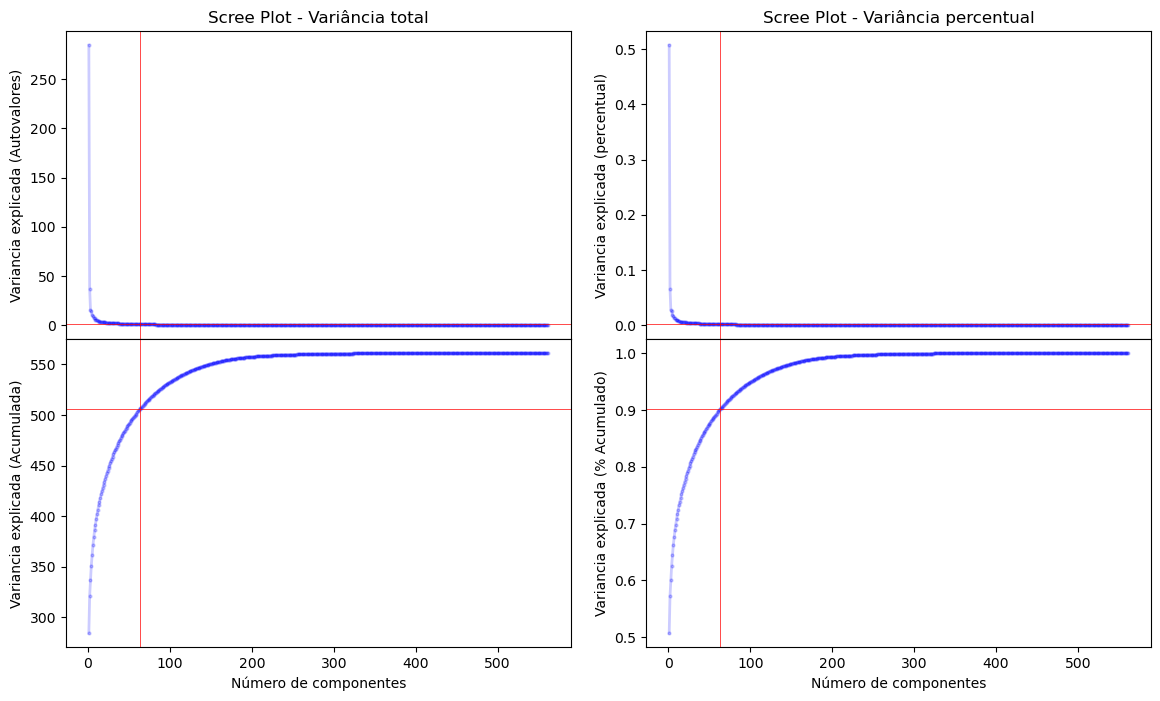

In [44]:
ncomp = screeplot(prcomp, varexplicada=.90)

## Sem Padronização dos Dados

In [45]:
prcomp_2 = PCA().fit(X_train)

In [46]:
def screeplot(prcomp_2, ncomp = 0, varexplicada=0, criterio=1):
    
    if ncomp>0:
        ncomp_crit=ncomp
    elif varexplicada > 0:
        ncomp_crit = (prcomp_2.explained_variance_ratio_.cumsum()<varexplicada).sum()+1 
        # Critério 1: autovalor padronizado > 1
    elif criterio == 1:
        ncomp_crit = (prcomp_2.explained_variance_ratio_>1/princomp.n_components_).sum()
    else: ncomp_crit = None
    
    fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
    plt.subplots_adjust(hspace=0, wspace=.15)


    num_componentes = np.arange(prcomp_2.n_components_) + 1
    ax[0,0].plot(num_componentes, prcomp_2.explained_variance_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
    ax[0,0].set_title('Scree Plot - Variância total')
    ax[0,0].set_xlabel('Número de componentes')
    ax[0,0].set_ylabel('Variancia explicada (Autovalores)')

    ax[1,0].plot(num_componentes, prcomp_2.explained_variance_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
    ax[1,0].set_xlabel('Número de componentes')
    ax[1,0].set_ylabel('Variancia explicada (Acumulada)')


    ax[0,1].plot(num_componentes, prcomp_2.explained_variance_ratio_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
    ax[0,1].set_title('Scree Plot - Variância percentual')
    ax[0,1].set_xlabel('Número de componentes')
    ax[0,1].set_ylabel('Variancia explicada (percentual)')

    ax[1,1].plot(num_componentes, prcomp_2.explained_variance_ratio_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
    ax[1,1].set_xlabel('Número de componentes')
    ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')
    
    if ncomp_crit != None:
        # Linhas verticais de referência
        ax[0,0].axvline(x = ncomp_crit, color = 'r', linestyle = '-', linewidth=.5)
        ax[1,1].axvline(x = ncomp_crit, color = 'r', linestyle = '-', linewidth=.5)
        ax[1,0].axvline(x = ncomp_crit, color = 'r', linestyle = '-', linewidth=.5)
        ax[0,1].axvline(x = ncomp_crit, color = 'r', linestyle = '-', linewidth=.5)


        # linhas horizontais
        variancia               = prcomp_2.explained_variance_[ncomp_crit-1]
        variancia_acumulada     = prcomp_2.explained_variance_.cumsum()[ncomp_crit-1]
        pct_variancia           = prcomp_2.explained_variance_ratio_[ncomp_crit-1]
        pct_variancia_acumulada = prcomp_2.explained_variance_ratio_.cumsum()[ncomp_crit-1]
        
        ax[0,0].axhline(y = variancia              , color = 'r', linestyle = '-', linewidth=.5)
        ax[1,0].axhline(y = variancia_acumulada    , color = 'r', linestyle = '-', linewidth=.5)
        ax[0,1].axhline(y = pct_variancia          , color = 'r', linestyle = '-', linewidth=.5)
        ax[1,1].axhline(y = pct_variancia_acumulada, color = 'r', linestyle = '-', linewidth=.5)


    print(f'Número de componentes:............... {ncomp_crit}')
    print(f'Variância da ultima CP:.............. {variancia:.2f}' )
    print(f'Variância total explicada:........... {variancia_acumulada:.2f}' )
    print(f'Variância percentual da última CP:... {100*pct_variancia:.2f}%' )
    print(f'Variância percentual total explicada: {100*pct_variancia_acumulada:.2f}%' )
    plt.show()
    return ncomp_crit

Número de componentes:............... 34
Variância da ultima CP:.............. 0.13
Variância total explicada:........... 50.16
Variância percentual da última CP:... 0.24%
Variância percentual total explicada: 90.12%


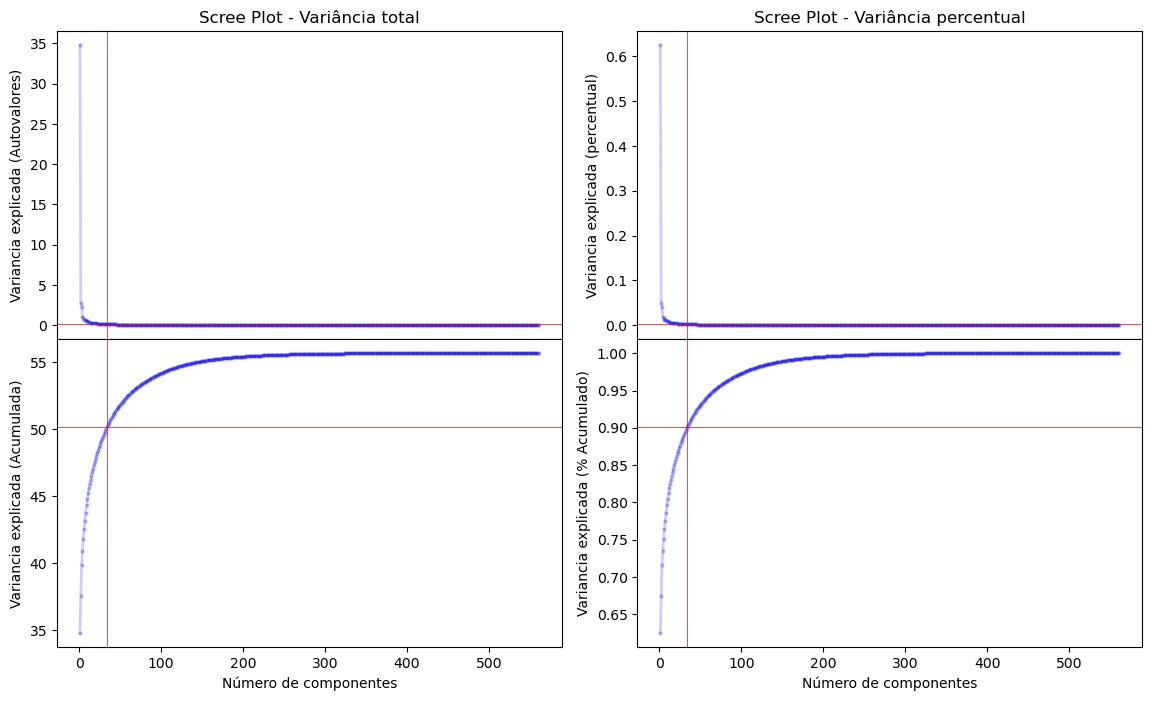

In [47]:
ncomp = screeplot(prcomp_2, varexplicada=.90)

   #### Usando a padronização dos dados, o numero de componentes ficou em 63, sem a padronização caiu para 34. A diferença mais expressiva foi na Variância total explicada, que na padronização ficou em 505.68 e sem padronização ficou em 50.43.

## Árvore com PCA

Faça duas uma árvore de decisão com 10 componentes principais - uma com base em dados padronizados e outra sem padronizar. Utilize o ```ccp_alpha=0.001```.

Compare a acurácia na base de treino e teste.

## Sem Padronização:

In [48]:
%%time
prcomp = PCA(n_components=561).fit(X_train)

pc_treino = prcomp.transform(X_train)
pc_teste  = prcomp.transform(X_test)

pc_treino.shape

CPU times: total: 2.45 s
Wall time: 393 ms


(5514, 561)

In [49]:
%%time
n=10

colunas = ['cp'+str(x+1) for x in list(range(n))]

pc_train = pd.DataFrame(pc_treino[:,:n], columns = colunas)
pc_teste  = pd.DataFrame( pc_teste[:,:n], columns = colunas)

pc_teste.head()

CPU times: total: 0 ns
Wall time: 0 ns


,cp1,cp2,cp3,cp4,cp5,cp6,cp7,cp8,cp9,cp10
0,-3.994114,-2.177661,-0.797396,-0.278810,0.000160,0.297743,-0.310882,0.802135,1.216137,-0.071445
1,-6.607609,2.736537,1.604066,0.290467,0.679331,-0.730848,-0.196083,-1.088270,-0.268575,1.043281
2,7.368413,0.995270,0.124766,-0.384752,-0.578150,-0.417938,-1.588817,0.731951,0.668689,0.488335
3,5.663195,-0.629927,0.352371,-0.317825,0.249723,-0.909131,-0.211075,-0.388018,-0.707385,0.004377
4,5.895197,0.135830,-0.694725,-0.550059,1.056290,0.538556,-0.449472,0.303255,0.190694,0.393133


#### Árvore _ Treino:

In [59]:
arvore_treino = DecisionTreeClassifier(random_state=2360873, ccp_alpha=0.001)
arvore_treino.fit(pc_train, y_train)

print(f"Profundidade: {arvore_treino.tree_.max_depth}")
print(f"Acurácia na base de teste: {arvore_treino.score(pc_train, y_train):.2f}")
print(f"MSE na base de teste: {mean_squared_error(y_train, arvore_treino.predict(pc_train)):.2f}")

Profundidade: 11
Acurácia na base de teste: 0.91
MSE na base de teste: 0.12


In [50]:
arvore_01_test = DecisionTreeClassifier(random_state=2360873, ccp_alpha=0.001)
arvore_01_test.fit(pc_teste, y_test)

DecisionTreeClassifier(ccp_alpha=0.001, random_state=2360873)

In [51]:
print(f"Profundidade: {arvore_01_test.tree_.max_depth}")
print(f"Acurácia na base de teste: {arvore_01_test.score(pc_teste, y_test):.2f}")
print(f"MSE na base de teste: {mean_squared_error(y_test, arvore_01_test.predict(pc_teste)):.2f}")

Profundidade: 13
Acurácia na base de teste: 0.96
MSE na base de teste: 0.07


#### A árvore de teste apresentou uma melhor acurácia em relação ao treino, sem padronização.

## Com Padronização:

In [52]:
%%time

def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean())/s.std()
    return s

X_test_pad = pd.DataFrame(X_test).apply(padroniza, axis=0)
X_test_pad.head()

CPU times: total: 203 ms
Wall time: 334 ms


,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
7013,-0.112558,-1.118426,0.477377,-0.811236,-0.699112,-0.772166,-0.808712,-0.693147,-0.772416,-0.820587,...,-2.501794,-0.308278,-0.471126,0.042784,-0.922143,0.336904,-1.510685,-0.567390,0.166411,-0.334126
63,0.080296,0.022449,0.022143,-0.845881,-0.939176,-0.899780,-0.837273,-0.939711,-0.904074,-0.841043,...,2.308795,-1.105288,-0.844380,0.515302,0.703227,1.076460,0.729071,1.765454,-2.020321,-1.392827
3742,0.816634,0.685853,-0.441008,1.419576,1.026976,0.456176,1.339412,1.195539,0.486695,1.816832,...,0.445250,-0.088206,-0.102822,-0.845008,0.073169,1.360576,1.205941,-0.551458,0.649343,0.331929
6607,2.070710,0.934290,-0.466173,1.010939,1.002566,0.848108,1.000083,0.943547,0.653356,1.000010,...,0.504321,0.201496,0.267128,-1.334461,-0.948810,-0.705242,0.411363,-0.072235,0.927596,1.025647
120,0.221078,0.873297,-0.121449,0.558904,0.863190,0.828468,0.514507,0.731932,0.805805,0.543934,...,-0.210580,0.425460,0.295377,0.169500,-1.100760,0.996304,0.748181,-0.549552,0.657647,0.281037


In [53]:
%%time
prcomp = PCA(n_components=561).fit(X_train_pad)

pc_treino_pad = prcomp.transform(X_train_pad)
pc_teste_pad  = prcomp.transform(X_test_pad)

pc_treino.shape

CPU times: total: 2.36 s
Wall time: 472 ms


(5514, 561)

In [54]:
%%time
n=10

colunas = ['cp'+str(x+1) for x in list(range(n))]

pc_train_pad = pd.DataFrame(pc_treino_pad[:,:n], columns = colunas)
pc_teste_pad  = pd.DataFrame( pc_teste_pad[:,:n], columns = colunas)

pc_teste_pad.head()

CPU times: total: 0 ns
Wall time: 724 µs


,cp1,cp2,cp3,cp4,cp5,cp6,cp7,cp8,cp9,cp10
0,-11.229366,-6.513570,-0.181473,2.467308,3.441215,2.347348,1.312804,2.040944,2.326629,0.204261
1,-16.586490,8.623682,0.828937,-1.949947,-3.861883,-3.237684,0.189115,0.604347,-0.329875,0.718815
2,21.840691,1.529620,-4.606830,-4.319810,1.998686,-2.307676,3.054370,1.843027,-1.001966,-1.910613
3,14.206386,-3.622331,-2.188753,-1.247615,-1.465160,-3.464126,-1.341827,-2.190075,1.324674,-1.491858
4,15.863678,-0.875476,-3.681849,3.206327,-2.793647,0.844120,1.160201,-0.529970,0.015199,1.791211


#### Árvore _ Teste:

In [55]:
arvore_test_pad = DecisionTreeClassifier(random_state=2360873, ccp_alpha=0.001)
arvore_test_pad.fit(pc_teste_pad, y_test)

DecisionTreeClassifier(ccp_alpha=0.001, random_state=2360873)

In [56]:
print(f"Profundidade: {arvore_test_pad.tree_.max_depth}")
print(f"Acurácia na base de teste: {arvore_test_pad.score(pc_teste_pad, y_test):.2f}")
print(f"MSE na base de teste: {mean_squared_error(y_test, arvore_test_pad.predict(pc_teste_pad)):.2f}")

Profundidade: 13
Acurácia na base de teste: 0.96
MSE na base de teste: 0.07


#### Árvore _ Treino:

In [58]:
arvore_treino_pad = DecisionTreeClassifier(random_state=2360873, ccp_alpha=0.001)
arvore_treino_pad.fit(pc_train_pad, y_train)

print(f"Profundidade: {arvore_treino_pad.tree_.max_depth}")
print(f"Acurácia na base de teste: {arvore_treino_pad.score(pc_train_pad, y_train):.2f}")
print(f"MSE na base de teste: {mean_squared_error(y_train, arvore_treino_pad.predict(pc_train_pad)):.2f}")

Profundidade: 10
Acurácia na base de teste: 0.89
MSE na base de teste: 0.18


##### A árvore de teste apresentou uma acurácia melhor que a de treino, com padronização.

#### No geral, as árvores de teste apresentaram a mesma acurácia com e sem padronização.